<a href="https://colab.research.google.com/github/Donya-Vafanejad/Admission_Basic_Keras/blob/main/Admission_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Load Libraries
#Dataset = Admissions
#Input = 3 variables- gre, gpa, rank
#Number of Hidden Layer = 1, Number of neurons in hidden layer =5
#Output = 2, categorical:0,1 mens not-admit, 1,0 means admit

import numpy as np
import pandas as pd

from datascience import *

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
RANDOM_SEED =42




/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
#2. Read Dataset
from google.colab import files
uploaded = files.upload()


Saving Admissions.csv to Admissions.csv


In [ ]:
data = pd.read_csv('Admissions.csv')
data.head()
features = data[["gre", "gpa", "rank"]]
print(type(features))
print(features[:5])
labels = np.array(data["admit"].values)
print(type(labels))
print(labels)


<class 'pandas.core.frame.DataFrame'>
   gre   gpa  rank
0  380  3.61     3
1  660  3.67     3
2  800  4.00     1
3  640  3.19     4
4  520  2.93     4
<class 'numpy.ndarray'>
[0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0
 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0]


In [ ]:
#3. Scale the predictor variable values between 0 and 1
featuresScale = preprocessing.minmax_scale(features)
print(type(featuresScale))
featuresScale[0:5]

<class 'numpy.ndarray'>


array([[0.27586207, 0.77586207, 0.66666667],
       [0.75862069, 0.81034483, 0.66666667],
       [1.        , 1.        , 0.        ],
       [0.72413793, 0.53448276, 1.        ],
       [0.51724138, 0.38505747, 1.        ]])

In [ ]:
#4. Encode the response categorical variable into one-hot variable
#using Pandas to get dummies data
#Convert 'label_onehot' back to np.array

labels_onehot_dataframe = pd.get_dummies(labels)
one_hot = np.array(labels_onehot_dataframe)
print(one_hot[0:25,:])

[[1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [1 0]
 [0 1]]


In [ ]:
#5. Split data into "Training" and "Testing"
train_feats, test_feats, train_lab, test_lab = train_test_split(featuresScale, one_hot, test_size=0.30, random_state=RANDOM_SEED)
print(train_feats.shape)
print(train_lab.shape)
print("===================")
print("Training Data-feature")
print(train_feats.shape)
print(train_feats[:5,:])

print("Training Data-Label")
print(train_lab.shape)
print(train_lab[:5,:])




(280, 3)
(280, 2)
Training Data-feature
(280, 3)
[[0.44827586 0.75862069 0.        ]
 [0.44827586 0.68390805 0.33333333]
 [0.24137931 0.17241379 0.66666667]
 [0.62068966 0.88505747 0.33333333]
 [0.93103448 0.62643678 0.33333333]]
Training Data-Label
(280, 2)
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


In [ ]:
print("Testing Data-feature")
print(test_feats.shape)
print(test_feats[:5,:])

print("Training Data-Label")
print(test_lab.shape)
print(test_lab[:5,:])


Testing Data-feature
(120, 3)
[[0.62068966 0.71264368 0.33333333]
 [0.75862069 0.96551724 0.33333333]
 [1.         1.         0.66666667]
 [0.89655172 0.62068966 1.        ]
 [0.62068966 0.38505747 0.33333333]]
Training Data-Label
(120, 2)
[[1 0]
 [1 0]
 [0 1]
 [1 0]
 [1 0]]


In [ ]:
#6. Build the Neural Netwok Model Using Keras/TF
feat_shape = train_feats.shape[1]
print(feat_shape)
hidden_nodes = 5
out_shape = train_lab.shape[1]
print(out_shape)
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, Activation
print('keras_version:', ks.__version__)
model = Sequential()
model.add(Dense(hidden_nodes, activation ='relu', input_dim=feat_shape))
model.add(Dense(out_shape, activation='softmax'))

#compile model
model.compile(loss= "categorical_crossentropy", optimizer='adam')
model.summary()

3
2
keras_version: 2.6.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#7. Train the model
print(train_feats.shape)
print(train_lab.shape)
epochs = 10000

hist = model.fit(train_feats, train_lab, epochs=epochs, batch_size=128, verbose=0)




(280, 3)
(280, 2)


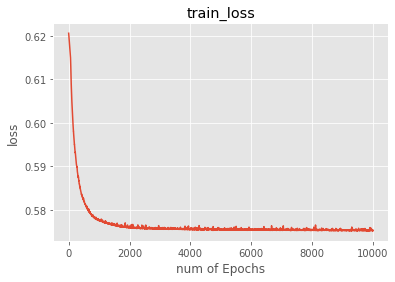

In [ ]:
#visualizing losses

import matplotlib.pyplot as plt

train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)
plt.figure(1, figsize=(7,5))
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)
plt.style.use(['ggplot'])



In [ ]:

#8. Print values of all the weights and bias of all the neurons of the Neural Network
for layerNum, layer in enumerate(model.layers):
  print("Layer Number = ", layerNum)
  print("Weights Value =")
  weights = layer.get_weights()[0]
  print(weights)
  print("Bias values = ")
  biases = layer.get_weights()[1]
  print(biases)
  print("============================")

Layer Number =  0
Weights Value =
[[-0.06663681 -0.55317485  0.00103694 -0.1931656  -0.22628346]
 [-0.03851621 -0.21988931 -0.4355571  -0.035707   -0.6941776 ]
 [ 0.7041743   0.5809111  -0.17992926 -0.0300706   0.5382864 ]]
Bias values = 
[-0.14624284  0.4628486   0.          0.          0.74289614]
Layer Number =  1
Weights Value =
[[-0.12954402 -0.18283549]
 [ 0.11865511 -0.82396305]
 [ 0.4857658   0.6235949 ]
 [ 0.09512281  0.800894  ]
 [ 1.0167422  -1.1357324 ]]
Bias values = 
[-0.15497597  0.1549762 ]


In [ ]:
#9. Predict the outcome using the "Testing" data
#Take the first observation from the "train" dataset to test the model

model.predict(train_feats[0:1], batch_size =None, verbose =0, steps=None)




array([[0.49563608, 0.5043639 ]], dtype=float32)

In [ ]:
train_lab[0:1]

array([[0, 1]], dtype=uint8)

In [ ]:
pred = model.predict(test_feats)
predClass = np.argmax(pred, axis=1)
print(predClass)

observed = np.argmax(test_lab, axis=1)
print(observed)

[0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 0]
[0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 0]


In [ ]:
#10. Build confusion matrix
#11.Compute the accuracy of the predictions 
cm = confusion_matrix(predClass, observed)
print(cm)
print('Accuracy Score:', accuracy_score(predClass, observed))


[[73 27]
 [ 8 12]]
Accuracy Score: 0.7083333333333334
